# Ex3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import skimage
from skimage import util

### Q1

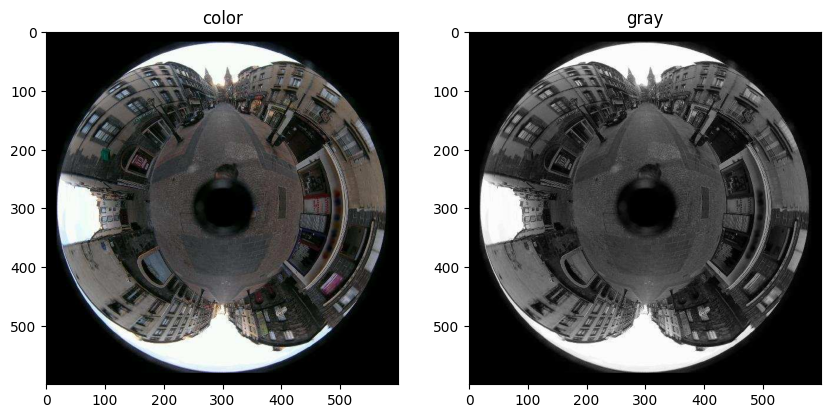

In [2]:
oldtown_color = skimage.io.imread('images/oldtown.png')
oldtown = skimage.color.rgb2gray(oldtown_color)
two_plots('color', oldtown_color, 'gray', oldtown, cmap1=None)

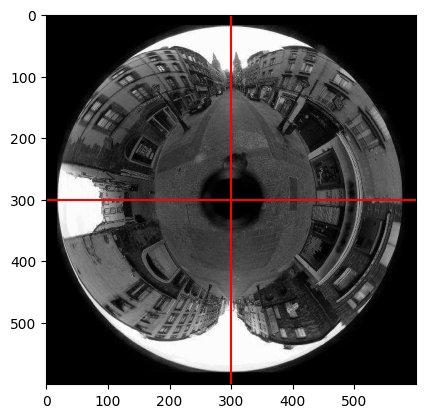

In [3]:
x0, y0 = oldtown.shape[0] // 2, oldtown.shape[1] // 2

# On vérifie que le centre de l'image est bien le centre du cercle
plt.imshow(oldtown, cmap='gray')
plt.plot([0, oldtown.shape[1]-1], [y0, y0], 'r-')
plt.plot([x0, x0], [0, oldtown.shape[0]-1], 'r-')
plt.show()

In [4]:
# On fait -x0 et -y0 pour placer l'origine au centre de l'image
xx1, yy1 = np.meshgrid(np.arange(oldtown.shape[1]) - x0, np.arange(oldtown.shape[0]) - y0)
xx1 = xx1.flatten()
yy1 = yy1.flatten()

### Q2 & Q3

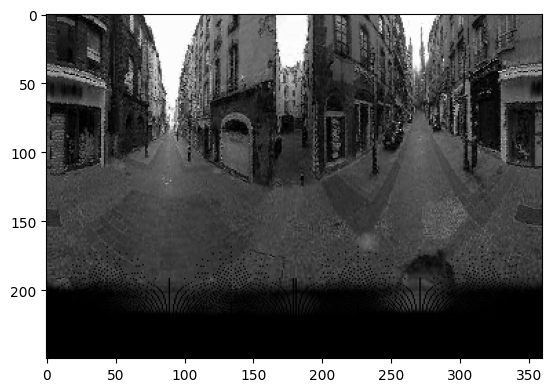

In [5]:
O = np.zeros((250, 360))

rr = np.sqrt(xx1**2 + yy1**2)
ttheta = np.arctan2(yy1, xx1)

mask = rr < 250
rr = rr[mask]
ttheta = ttheta[mask]
oldtown_part = oldtown.flatten()[mask]
O[rr.astype(int), np.degrees(ttheta).astype(int)] = oldtown_part

# L'image est a l'envers, en polaire les rayons (rr) ascendants vont du sol vers le ciel (voir image de base),
# en cartésien les O[i,:] avec i ascendant va de bas en haut, et on a `O[rr, ttheta] = old`
# Le sol est donc en haut et le ciel en bas
# On flip donc l'image pour la remettre dans le bon sens
O = np.flip(O, axis=0)

plt.imshow(O, cmap='gray')
plt.show()

### Q4

In [6]:
def polar(I):
    O = np.zeros((250, 360))

    xx1, yy1 = np.meshgrid(np.arange(I.shape[1]) - x0, np.arange(I.shape[0]) - y0)
    xx1 = xx1.flatten()
    yy1 = yy1.flatten()

    xx2, yy2 = np.meshgrid(np.arange(O.shape[1]), np.arange(O.shape[0]))
    xx2 = xx2.flatten()
    yy2 = yy2.flatten()

    xx, yy = np.cos(np.deg2rad(xx2))*yy2, np.sin(np.deg2rad(xx2))*yy2
    xxyy = np.stack([xx.flatten(), yy.flatten()])

    O = griddata((xx1, yy1), I.flatten(), xxyy.T, method='linear', fill_value=0).reshape(O.shape)

    O = np.flip(O, axis=0)
    return O

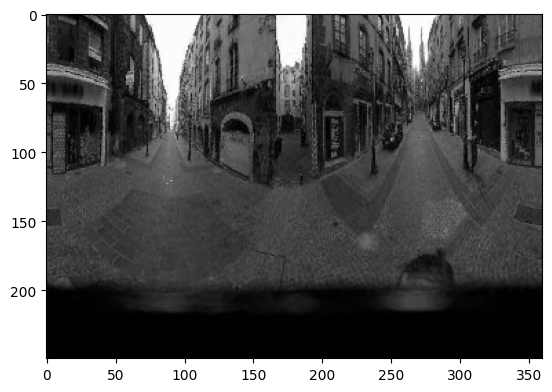

In [7]:
O = polar(oldtown)
plt.imshow(O, cmap='gray')
plt.show()

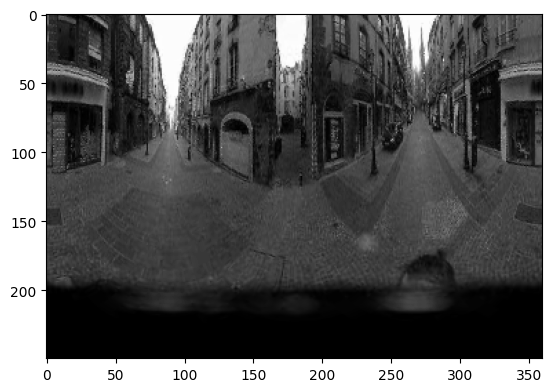

In [8]:
# Une implémentation existe aussi dans la méthode warp_polar de skimage.transform
plt.imshow(np.flip(skimage.transform.warp_polar(oldtown, radius=250, output_shape=(360, 250)).T, axis=0), cmap='gray')
plt.show()

### Q5

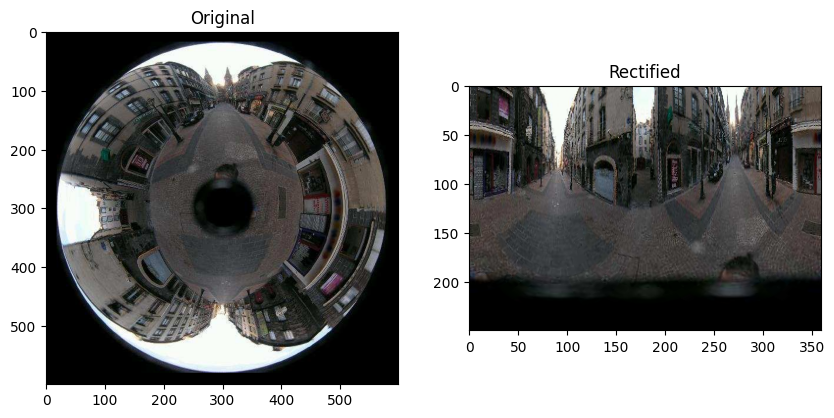

In [9]:
oldtown_color = util.img_as_ubyte(oldtown_color).astype('int')
oldtown_color_new = np.zeros((250, 360, 3))

for i in range(3):
    oldtown_color_new[:, :, i] = polar(oldtown_color[:, :, i])

oldtown_color_new = oldtown_color_new.astype('int')
two_plots('Original', oldtown_color, 'Rectified', oldtown_color_new, cmap1=None, cmap2=None)